# Flip Flop Problem

In [14]:
import mlrose_hiive
import numpy as np
import time
import matplotlib.pyplot as plt

References
* [mlrose tutorial](https://github.com/gkhayes/mlrose/blob/master/tutorial_examples.ipynb)
* [mlrose documentation](https://mlrose.readthedocs.io/en/stable/)

In [7]:
problem = mlrose_hiive.FlipFlopGenerator.generate(0, 15)

In [22]:
def find_best_runs(df_run_curves):
    best_fitness = df_run_curves['Fitness'].min()
    best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
    print(best_runs)
    
def fitness_curve(curve, title):
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.title(title)
    length = len(curve)
    y = "Fitness"
    plt.plot(range(length), curve, label="Fitness", lw=2)
    plt.legend(loc="best")
    plt.show()

In [43]:
rhc = mlrose_hiive.RHCRunner(problem=problem,
                experiment_name="RHC on FFP",
                seed=0,
                iteration_list=[512],
                max_attempts=300,
                restart_list=[25, 75, 100])   

df_run_stats, df_run_curves = rhc.run()
find_best_runs(df_run_curves)

       Iteration      Time  Fitness   FEvals  Restarts  max_iters  \
17778          1  0.001326      3.0   9286.0        75        512   
22274          1  0.001326      3.0  13825.0        75        512   
42273          1  0.001326      3.0   9286.0       100        512   
46769          1  0.001326      3.0  13825.0       100        512   

       current_restart  
17778               28  
22274               42  
42273               28  
46769               42  


In [44]:
st = time.time()
best_state, best_fitness, rhc_curve = mlrose_hiive.random_hill_climb(problem,
                                                         max_attempts=300,
                                                         max_iters=512,
                                                         random_state=0,
                                                         restarts=105,
                                                         curve=True)
et = time.time()

rhc_wc_time = et - st
print("Time for RHC FFP: ", rhc_wc_time)

Time for RHC FFP:  0.016808748245239258


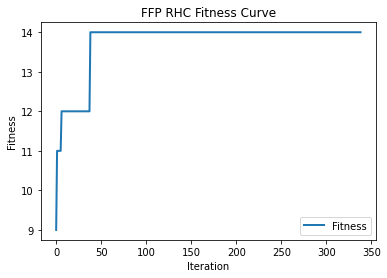

In [55]:
fitness_curve(rhc_curve[:,0], "FFP RHC Fitness Curve")


In [46]:
sa = mlrose_hiive.SARunner(problem=problem,
                  experiment_name="SA on FFP",
                  seed=0,
                  iteration_list=[512],
                  max_attempts=300,
                  temperature_list=[0.1, 1, 10, 100],
                  decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])

df_run_stats_sa, df_run_curves_sa = sa.run()
find_best_runs(df_run_curves_sa)

      Iteration      Time  Fitness  FEvals Temperature  max_iters
1563        167  0.002882      1.0   322.0          10        512


In [49]:
st = time.time()
best_state, best_fitness, sa_curve = mlrose_hiive.simulated_annealing(problem,
                                                             max_attempts=300,
                                                             max_iters=512,
                                                             random_state=0,
                                                             schedule=mlrose_hiive.GeomDecay(10),
                                                             curve=True)
et = time.time()
sa_wc_time = et - st
print("Time for SA CPP: ", sa_wc_time)

Time for SA CPP:  0.03619098663330078


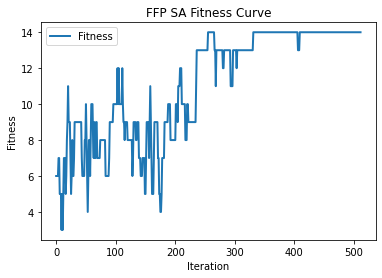

In [58]:
fitness_curve(sa_curve[:,0], "FFP SA Fitness Curve")

In [60]:
ga = mlrose_hiive.GARunner(problem=problem,
                   experiment_name="GA on FFP",
                   seed=0,
                   max_attempts=300,
                   iteration_list=[512],
                   population_sizes=[500, 1000],
                   mutation_rates=[0.1, 0.25, 0.5])
df_run_stats_ga, df_run_curves_ga = ga.run()
find_best_runs(df_run_curves_ga)

    Iteration      Time  Fitness  FEvals  Population Size  Mutation Rate  \
0           0  0.002732      6.0     0.0              500           0.10   
6           0  0.002732      6.0     0.0              500           0.25   
12          0  0.002732      6.0     0.0              500           0.50   
16          0  0.002732      6.0     0.0             1000           0.10   
19          0  0.002732      6.0     0.0             1000           0.25   
22          0  0.002732      6.0     0.0             1000           0.50   

    max_iters  
0         512  
6         512  
12        512  
16        512  
19        512  
22        512  


In [68]:
st = time.time()
best_state, best_fitness, ga_curve = mlrose_hiive.genetic_alg(problem,
                                                   max_attempts=300,
                                                   max_iters=512,
                                                   random_state=0,
                                                   pop_size=500,
                                                   mutation_prob=0.10,
                                                   curve=True)
et = time.time()
sa_wc_time = et - st
print("Time for GA CPP: ", sa_wc_time)

Time for GA CPP:  2.440134286880493


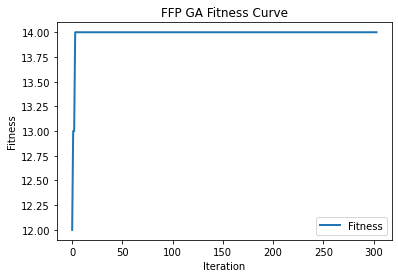

In [69]:
fitness_curve(ga_curve[:,0], "FFP GA Fitness Curve")

In [67]:
mimic = mlrose_hiive.MIMICRunner(problem=problem,
                       experiment_name="FFP MIMIC Fitness Curve",
                       seed=0,
                       population_sizes=[100, 500, 1000],
                       keep_percent_list=[0.05, 0.1, 0.15],
                       iteration_list=[512],
                       max_attempts=300,
                       use_fast_mimic=True)
mimic_stats, mimic_curve = mimic.run()
find_best_runs(mimic_curve)

     Iteration      Time  Fitness  FEvals  use_fast_mimic  Population Size  \
0            0  0.001473      6.0     0.0            True              100   
302          0  0.001473      6.0     0.0            True              100   
604          0  0.001473      6.0     0.0            True              100   
906          0  0.001473      6.0     0.0            True              500   
908          0  0.001473      6.0     0.0            True              500   
910          0  0.001473      6.0     0.0            True              500   
912          0  0.001473      6.0     0.0            True             1000   
914          0  0.001473      6.0     0.0            True             1000   
916          0  0.001473      6.0     0.0            True             1000   

     Keep Percent  max_iters  
0            0.05        512  
302          0.10        512  
604          0.15        512  
906          0.05        512  
908          0.10        512  
910          0.15        512  
91

In [71]:
st = time.time()
best_state, best_fitness, mimic_curve = mlrose_hiive.mimic(problem,
                                             max_attempts=300,
                                             max_iters=512,
                                             random_state=0,
                                             pop_size=100,
                                             keep_pct=0.05,
                                             curve=True)
et = time.time()
mimic_wc_time = et - st
print("Time for mimic CPP: ", sa_wc_time)

Time for mimic CPP:  2.440134286880493


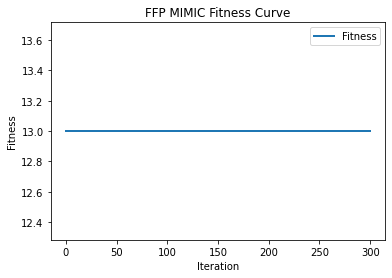

In [87]:

fitness_curve(mimic_curve[:,0], "FFP MIMIC Fitness Curve")

Text(0, 0.5, 'Fitness')

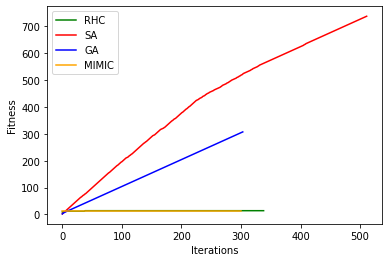

In [85]:
iterations = range(1, 500)
plt.plot(rhc_curve[:, 0], label='RHC', color='green')
plt.plot(sa_curve[:, 1], label='SA', color='red')
plt.plot(ga_curve[:, 1], label='GA', color='blue')
plt.plot(mimic_curve[:, 0], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")